In [1]:
import pandas as pd
import numpy as np
import hics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.datasets import load_svmlight_file

1_wHiCS: 10 datasets, each 100 independent features, 40 of them useful  
2_wRaR: 10 datasets, each 30 independent features, 20 of them useful, 70 dependent features  
3_wRaR: 10 datasets, each 100 independent features, 50 of them useful, 100 dependent features  
5_wrar: 1 dataset, 40 independent features, 25 of them useful, 20 dependent  
6_wrar: 3 datasets, 40 independent, 30 useful, 40 dependent  
7_wrar: 4 datasets, 40 independent, 30 useful, 40 dependent   
8_wrar: 4 datasets, each 30 independent features, 20 of them useful, 70 dependent features 

In [45]:
datas = []
for i in range(1, 11):
    X, y = load_svmlight_file('../data/gas_sensor/batch'+ str(i) +'.dat')
    data = pd.SparseDataFrame(X).to_dense()
    data[128] = y
    data[128] = data[128].astype(np.float32)
    data.rename(columns=lambda c: str(c), inplace=True)
    datas.append(data)
target = str(128)
data = pd.concat(datas).reset_index(drop=True)

In [46]:
np.unique(data[target], return_counts=True)[1] / len(data)

array([ 0.18439971,  0.21035226,  0.11797268,  0.13918045,  0.21631919,
        0.1317757 ])

In [ ]:
dist = np.array([1/6] * 6)
while gini(dist) < 0.4:
    dist = np.random.rand(6)
dist /= sum(dist)
dist

In [23]:
len(imb_data)

8343

In [48]:
# Artificially imbalance dataset
class1 = data.loc[data[target] == 1]
class2 = data.loc[data[target] == 2]
class3 = data.loc[data[target] == 3]
class4 = data.loc[data[target] == 4]
class5 = data.loc[data[target] == 5]
class6 = data.loc[data[target] == 6]
new_dist = [class1.sample(frac=0.2), class2.sample(frac=1), class3.sample(frac=0.6), 
            class4.sample(frac=1), class5.sample(frac=0.05), class6.sample(frac=1)]
imb_data = pd.concat(new_dist).reset_index(drop=True)

gini(np.unique(imb_data[target], return_counts=True)[1]/len(data))

0.37949940061904208

In [21]:
gini(np.unique(imb_data[target], return_counts=True)[1] / len(data))

0.37949940061904208

In [52]:
data = imb_data

In [61]:
a = [0] * 128
len(a[:128])

128

In [55]:
X = imb_data.drop(target, axis=1)
y = imb_data[target]

clf_all = KNeighborsClassifier(n_neighbors=5)
f1_macros = cross_val_score(clf_all, X, y, cv=3, scoring='f1_macro')
f1_macros

array([ 0.95581431,  0.94242078,  0.95986598])

In [25]:
import csrar

rar = csrar.rar.RaR(data)
rar.run(target, k=5, runs=50, split_iterations=10, compensate_imbalance=True)

rar_nocomp = csrar.rar.RaR(data)
rar_nocomp.run(target, k=5, runs=50, split_iterations=10, compensate_imbalance=False)

Generated cost matrix:
         1.0       2.0       3.0       4.0    5.0       6.0
0  16.263158  2.851333  8.470051  4.309401  55.62  4.551555
Overall cost matrix:
         1.0       2.0       3.0       4.0    5.0       6.0
0  16.263158  2.851333  8.470051  4.309401  55.62  4.551555
Relevance: 100.00%    
Running optimizer...
Optimizer done.
defaultdict(<class 'int'>, {'76': 0.1458114307455812, '9': 0.25362513156760752, '3': 0.4135806527907912, '79': 0.34861572332942864, '103': 0.062015106938144174, '45': 0.1545898173635552, '22': 0.18514922870201361, '52': 2.0702069181117487e-10, '119': 2.06887550082813e-10, '18': 0.18460771913938062, '26': 2.079031808010515e-10, '110': 2.0702069181117487e-10, '28': 0.39335141848669003, '13': 0.030750664990789517, '53': 2.0702069181117487e-10, '33': 0.39340851804269733, '120': 2.0933198392977505e-10, '2': 0.034009332586945669, '67': 2.0702069181117487e-10, '59': 2.0702069181117487e-10, '63': 2.0702069181117487e-10, '87': 2.0702069181117487e-10, '23': 

Relevance: 100.00%    
Running optimizer...
Optimizer done.
defaultdict(<class 'int'>, {'76': 3.454761604789703e-09, '9': 7.332020621558297e-12, '3': 7.332020621558297e-12, '79': 3.454761604789703e-09, '103': 0.03466660317836839, '45': 1.2301542779671052e-09, '22': 0.009738185366663757, '52': 1.0940629116808534e-11, '119': 7.332020621558297e-12, '18': 6.1251833124908795e-12, '26': 7.023364991120402e-12, '110': 0.30323770688601964, '28': 0.2752699632392775, '13': 0.4060983623856575, '53': 0.3961963163970413, '33': 0.43113222896089587, '120': 1.1098033914516336e-11, '2': 7.332020621558297e-12, '67': 7.332020621558297e-12, '59': 7.332020621558297e-12, '63': 7.332020621558297e-12, '87': 0.6560407623542382, '23': 7.332020621558297e-12, '125': 0.5546050379068003, '51': 0.524574908636744, '61': 0.15242458283765742, '47': 7.56934748017304e-12, '66': 0.6560407623109924, '54': 7.30790255318583e-12, '65': 7.332020621558297e-12, '83': 0.8960985923007451, '56': 0.47466066168620324, '126': 0.6585290

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import LinearSVC

# Train/Test split
X = data.drop(target, axis=1)
y = data[target]

# nm = RandomOverSampler(random_state=45622)
# X_res, y_res = nm.fit_sample(X, y)

# X = pd.DataFrame(X_res, columns=X.columns)
# y = y_res

print(np.unique(y, return_counts=True)[1])

max_k = 128
scores = pd.DataFrame(columns=['wRaR', 'RaR'], index=np.arange(1, max_k + 1)).fillna(0)

rank_columns_nocomp = [r[0] for r in rar_nocomp.feature_ranking]
from sklearn.metrics import f1_score
for k in range(1, max_k + 1):
    # clf = LinearSVC(class_weight='balanced')
    clf = KNeighborsClassifier(n_neighbors=5)
#     clf = GaussianNB()
    f1_macros = cross_val_score(clf, X[rank_columns_nocomp[:k]], y, cv=3, scoring='f1_macro')
    scores.loc[k, 'RaR'] = np.mean(f1_macros)

    # clf.fit(X_train[rank_columns_nocomp[:k]], y_train)
    # y_predict_ideal = clf.predict(X_test[rank_columns_nocomp[:k]])
    # score = f1_score(y_test, y_predict_ideal, average='macro')
    # scores.loc[k, 'RaR'] += score
    # for i, s in enumerate(score):
    #    scores.loc[k, 'RaR' + str(i)] += s

rank_columns = [r[0] for r in rar.feature_ranking]
for k in range(1, max_k + 1):
    # clf_selected = LinearSVC(class_weight='balanced')
    clf_selected = KNeighborsClassifier(n_neighbors=5)
#     clf_selected = GaussianNB()
    f1_macros = cross_val_score(clf_selected, X[rank_columns[:k]], y, cv=3, scoring='f1_macro')
    scores.loc[k, 'wRaR'] = np.mean(f1_macros)
    
    # clf_selected.fit(X_train[rank_columns[:k]], y_train)
    # y_predict = clf_selected.predict(X_test[rank_columns[:k]])
    # score = f1_score(y_test, y_predict, average='macro')
    # scores.loc[k, 'wRaR'] += score
    # for i, s in enumerate(score):
    #    scores.loc[k, 'wRaR' + str(i)] += s

# scores.to_csv('final2_wRaR_gas_nb_3cv.csv')
scores

[ 513 2926  985 1936  150 1833]


,wRaR,RaR
1,0.322862,0.342192
2,0.482221,0.612037
3,0.629909,0.458125
4,0.647844,0.475090
5,0.496638,0.481259
6,0.510827,0.481408
7,0.669233,0.485117
8,0.671115,0.552043
9,0.680239,0.555172
10,0.751952,0.700851


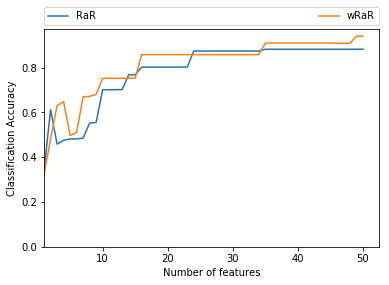

In [75]:
import matplotlib.pyplot as plt
plt.plot(scores['RaR'][:50], label='RaR')
plt.plot(scores['wRaR'][:50], label='wRaR')
ax = plt.gca()
ax.set_xlabel('Number of features')
ax.set_ylabel(r'Classification Accuracy')
ax.set_ylim(0.0)
ax.set_xlim(1)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
# plt.savefig('final2_wRaR_gas_5nn_3cv_best50_acc')
plt.show()

In [ ]:
scores

## Ground truth

In [ ]:
# For test7.arff
weights = [0.5335601544927123, 0.759839177764759, 0.772151052808685, 0.7625265610410171,
           0.5612073314384326, 0.34594353279215817, 0.26778115186982904, 0.05104168604756121,
           0.24539066769327755, 0.4298986108981449, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=input_features, index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
# For test8.arff
weights = [0.5335601544927123, 0.759839177764759, 0.772151052808685, 0.7625265610410171,
           0.5612073314384326, 0.34594353279215817, 0.26778115186982904, 0.05104168604756121,
           0.24539066769327755, 0.4298986108981449, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=data.columns[:20], index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
# For test9.arff
weights = [0.7168886878437233, 0.1650913157879492, 0.7017219042598103, 0.5371651431980248,
           0.4012494719087343, 0.08997742462568355, 0.4133240085774441, 0.3003377473503873,
           0.12858013417222078, 0.5857996257919974, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=data.columns[:20], index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
import arff
datas = []
for i in range(1, 4):
    file = open('../data/10_wrar/10_wrar_' + str(i) + '.arff', 'r')
    dataset = arff.load(file)
    file.close()
    data = pd.DataFrame(dataset['data'])
    data[100] = data[100].astype(np.float32)
    data.rename(columns=lambda c: str(c), inplace=True)
    datas.append(data)
target = str(100)

In [ ]:
# For test10.arff
weights = [0.2673055187472877, 0.196159223714542, 0.701161636883324, 0.765385125610722,
           0.0011260947105074194, 0.22801651296579062, 0.8949526553930152, 0.13072480437597472,
           0.6333889311003507, 0.7420344156127076, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
           0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
           0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
           0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
ground_truth = pd.DataFrame(columns=data.columns[:70], index=[0])
ground_truth.iloc[0] = weights
# ground_truth.rename(columns=lambda c: int(c), inplace=True)
ground_truth

In [ ]:
ideal_ranking = ground_truth.sort_values(0, axis=1, ascending=False).columns

## Compensating HiCS

In [ ]:
import arff
file = open('../data/5_wrar.arff', 'r')
dataset = arff.load(file)
data = pd.DataFrame(dataset['data'])
data[60] = data[60].astype(np.float32)
data.rename(columns=lambda c: str(c), inplace=True)
target = str(60)

## Standard HiCS

## Testing classifier

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)
X_res = pd.DataFrame(X_res, columns=X_train.columns)
# y_res = pd.DataFrame(y_res, columns=[20])

In [ ]:
counts/len(datas[0])

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

values, counts = np.unique(datas[0][target], return_counts=True)
marg = ax.bar(np.arange(5), counts/len(datas[0]), 0.35, color='green')
cond = ax.bar(np.arange(5) + 0.35, [0.03, 0.05, 0.7, 0.07, 0.15], 0.35, color='orange')
# ax.bar(np.arange(5), counts/len(data), 0.35, color='green')

ax.set_ylabel('Probability')
ax.set_xlabel('Class')
ax.set_title('Marginal and conditional probabilities')
ax.set_xticks(np.arange(5) + 0.35 / 2)
ax.set_xticklabels(('$c_1$', '$c_2$', '$c_3$', '$c_4$', '$c_5$'))
ax.set_ylim([0, 1])

ax.legend((marg, cond), ('Marginal distribution', 'Conditional distribution'))
plt.savefig('marg_cond')

plt.show()

In [ ]:
import warnings
warnings.filterwarnings("default")

In [ ]:
scores

In [ ]:
for data in datas:
    values, counts = np.unique(data[target], return_counts=True)
    print(counts/len(data))

In [ ]:
columns[:3]

In [ ]:
k = 15
results_nocomp = []
rank_columns_nocomp = [r[0] for r in rar_nocomp.feature_ranking]
from sklearn.metrics import f1_score
for j in range(25):
    clf = RandomForestClassifier()
    clf.fit(X_train[rank_columns_nocomp[:k]], y_train)
    y_predict_ideal = clf.predict(X_test[rank_columns_nocomp[:k]])
    results_nocomp.append(f1_score(y_test, y_predict_ideal, average='macro'))

results = []
rank_columns = [r[0] for r in rar.feature_ranking]
for j in range(25):
    clf_selected = RandomForestClassifier()
    clf_selected.fit(X_train[rank_columns[:k]], y_train)
    y_predict = clf_selected.predict(X_test[rank_columns[:k]])
    results.append(f1_score(y_test, y_predict, average='macro'))

print('Dataset 1_whics_' + str(i+1))#, file=log)
print('Weighted RaR macro-weighted F1: ' + str(np.mean(results)))#, file=log)
print('Standard RaR macro-weighted F1: ' + str(np.mean(results_nocomp)))#, file=log)
print('Difference weighted-standard: ' + str(np.mean(results) - np.mean(results_nocomp)))#, file=log)

## Cumulative Gain

In [ ]:
ideal_CG = [ground_truth.loc[0, ideal_ranking[:i].values].sum()
            for i in range(len(ideal_ranking))]
CG = [ground_truth.loc[0, [r for r in rank_columns[:i]]].sum()
      for i in range(len(rank_columns))]
nocomp_CG = [ground_truth.loc[0, [r for r in rank_columns_nocomp[:i]]].sum()
             for i in range(len(rank_columns_nocomp))]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(CG, label='Cumulative Gain Compensating HiCS')
plt.plot(nocomp_CG, label='Cumulative Gain Standard HiCS')
plt.plot(ideal_CG, label='Ideal gain')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
# plt.savefig('HiCS_test7_comp_imb2_CG_weightmod1-8')
plt.show()

## Rankings

In [ ]:
rank_columns_nocomp

In [ ]:
rank_columns

In [ ]:
ideal_ranking

In [ ]:
log = open('binary_wHiCS_log.txt', 'w')
for i, data in enumerate(datas):
    # Compensating HiCS
    #
    #
    values, counts = np.unique(data[target], return_counts=True)
    cost_matrix = pd.DataFrame(columns=values)
    for value, count in zip(values, counts):
        weighting = (len(data) / count)
        cost_matrix[value] = [weighting]
    cost_matrix = cost_matrix
    cost_matrix

    from hics.result_storage import DefaultResultStorage
    input_features = [ft for ft in data.columns.values if ft != target]
    storage = DefaultResultStorage(input_features)

    from hics.incremental_correlation import IncrementalCorrelation
    correlation = IncrementalCorrelation(data, target, storage,
                                         iterations=50, alpha=0.1,
                                         drop_discrete=False, cost_matrix=cost_matrix)

    correlation.update_bivariate_relevancies(runs=5)

    ranking = storage.get_relevancies().relevancy.sort_values(ascending=False)
    rank_columns = [tup[0] for tup in ranking.index.values]

    # Standard HiCS
    #
    #
    input_features = [ft for ft in data.columns.values if ft != target]
    storage_nocomp = DefaultResultStorage(input_features)
    correlation_nocomp = IncrementalCorrelation(data, target, storage_nocomp,
                                                iterations=50, alpha=0.1,
                                                drop_discrete=False, cost_matrix=None)

    correlation_nocomp.update_bivariate_relevancies(runs=5)

    ranking_nocomp = storage_nocomp.get_relevancies(
    ).relevancy.sort_values(ascending=False)
    rank_columns_nocomp = [tup[0] for tup in ranking_nocomp.index.values]

    # Train/Test split
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Test Classifier
    #
    #
    k = 10
    results_nocomp = []
    from sklearn.metrics import f1_score
    for j in range(100):
        clf = RandomForestClassifier()
        clf.fit(X_train[rank_columns_nocomp[:k]], y_train)
        y_predict_ideal = clf.predict(X_test[rank_columns_nocomp[:k]])
        results_nocomp.append(
            f1_score(y_test, y_predict_ideal, average='macro'))

    results = []
    for j in range(100):
        clf_selected = RandomForestClassifier()
        clf_selected.fit(X_train[rank_columns[:k]], y_train)
        y_predict = clf_selected.predict(X_test[rank_columns[:k]])
        results.append(f1_score(y_test, y_predict, average='macro'))
    
    print('Dataset 1_whics_' + str(i+1), file=log)
    print('Weighted RaR macro-weighted F1: ' + str(np.mean(results)), file=log)
    print('Standard RaR macro-weighted F1: ' + str(np.mean(results_nocomp)), file=log)
    print('Difference weighted-standard: ' + str(np.mean(results) - np.mean(results_nocomp)), file=log)
    log.flush()

In [ ]:
import csrar
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict

max_k = 50
classes = np.arange(len(np.unique(datas[0][target])))
columns = ['RaR' + str(i) for i in classes] + ['wRaR' + str(i) for i in classes]
scores = pd.DataFrame(columns=columns, index=np.arange(1,max_k+1)).fillna(0)

for data in datas:
    # Compensating RaR
    #
    #
    rar = csrar.rar.RaR(data)
    rar.run(target, k=5, runs=200, split_iterations=10, compensate_imbalance=True)

    # Standard RaR
    #
    #
    rar_nocomp = csrar.rar.RaR(data)
    rar_nocomp.run(target, k=5, runs=200, split_iterations=10, compensate_imbalance=False)

    # Train/Test split
    X = data.drop(target, axis=1)
    y = data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Test Classifier
    #
    #
    rank_columns_nocomp = [r[0] for r in rar_nocomp.feature_ranking]
    from sklearn.metrics import f1_score
    for k in range(1, max_k+1):
        clf = GaussianNB()
        clf.fit(X_train[rank_columns_nocomp[:k]], y_train)
        y_predict_ideal = clf.predict(X_test[rank_columns_nocomp[:k]])
        score = f1_score(y_test, y_predict_ideal, average='macro')
        scores.loc[k, 'RaR'] += score
        for i, s in enumerate(score):
            scores.loc[k, 'RaR' + str(i)] += s
        
    rank_columns = [r[0] for r in rar.feature_ranking]
    for k in range(1, max_k+1):
        clf_selected = GaussianNB()
        clf_selected.fit(X_train[rank_columns[:k]], y_train)
        y_predict = clf_selected.predict(X_test[rank_columns[:k]])
        score = f1_score(y_test, y_predict, average='macro')
        scores.loc[k, 'wRaR'] += score
        for i, s in enumerate(score):
            scores.loc[k, 'wRaR' + str(i)] += s

scores /= len(datas)
scores.to_csv('final_wRaR_3wrar_nb.csv')
scores

In [5]:
def gini(array):
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 0.0000001
    array = np.sort(array)
    index = np.arange(1,array.shape[0]+1)
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))